In [254]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
import pandas as pd
import numpy as np

In [255]:
from keras.preprocessing.text import Tokenizer

In [256]:
df=pd.read_csv('spam.csv')
df.shape
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [257]:
x=df.iloc[:2500,1]
y=df.iloc[:,0]

In [258]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(x)

In [259]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
2495    WINNER! As a valued network customer you hvae ...
2496    HCL chennai requires FRESHERS for voice proces...
2497    Dai what this da.. Can i send my resume to thi...
2498    I know where the  &lt;#&gt;  is, I'll be there...
2499                      Yup i've finished c Ì_ there...
Name: v2, Length: 2500, dtype: object

In [260]:
from keras import preprocessing
from keras.utils import pad_sequences

In [261]:
one_hot_results = tokenizer.texts_to_matrix(x)
one_hot_results.shape

(2500, 100)

In [262]:
x=one_hot_results
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [263]:
import sklearn.preprocessing as pre
import numpy as np
binr=pre.OneHotEncoder()
y=binr.fit_transform(np.c_[y]).toarray()
y.shape

(5572, 2)

In [264]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

In [249]:
from keras.layers import SimpleRNN

In [250]:
model = Sequential()
model.add(Embedding(1000, 8, input_length=100))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x, y,epochs=20,batch_size=32,validation_split=0.2)


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 100, 8)            8000      
                                                                 
 flatten_23 (Flatten)        (None, 800)               0         
                                                                 
 dense_28 (Dense)            (None, 2)                 1602      
                                                                 
Total params: 9602 (37.51 KB)
Trainable params: 9602 (37.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
63/63 [==============================] - 3s 19ms/step - loss: 0.4284 - acc: 0.8595 - val_loss: 0.3763 - val_acc: 0.8700
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3825 - acc: 0.8600 - val_loss: 0.3444 - val_acc: 0.8700
Epoch 3/20
63/63 [====

In [269]:
tokenizer.fit_on_texts(df.iloc[2700:2701,1].tolist())
sequences = tokenizer.texts_to_sequences(df.iloc[2700:2701,1].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 100)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 42, 40,
         9,  1, 60,  6, 62, 68,  2, 49, 29, 11, 33, 88, 40,  6, 33,  6,
         6, 34, 29, 41]])

In [270]:
import numpy as np

In [271]:
model.predict(x_test)

1/1 [==============================] - 0s 144ms/step


array([[0.9506639 , 0.04933609]], dtype=float32)

In [273]:
a=model.predict(x_test)
#classes_x=np.argmax(a,axis=1)
binr.inverse_transform(a)

1/1 [==============================] - 0s 109ms/step


array([['ham']], dtype=object)

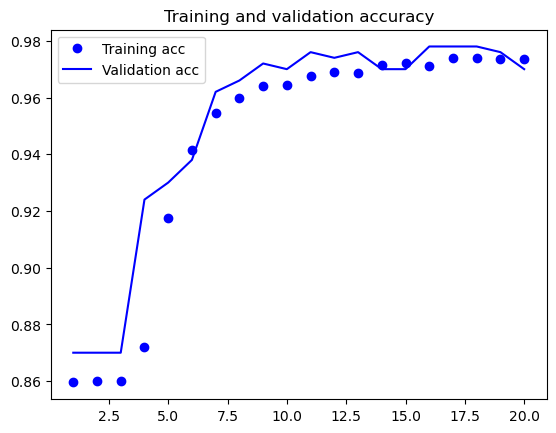

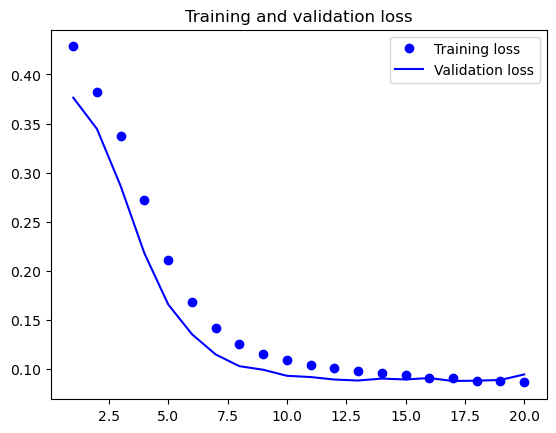

In [274]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [275]:
from keras.layers import SimpleRNN

In [276]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(1000, 8))
model.add(SimpleRNN(8))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x, y, epochs=10,batch_size=4,validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 17s 28ms/step - loss: 0.4312 - acc: 0.8595 - val_loss: 0.3866 - val_acc: 0.8700
Epoch 2/10
500/500 [==============================] - 13s 26ms/step - loss: 0.4051 - acc: 0.8600 - val_loss: 0.3854 - val_acc: 0.8700
Epoch 3/10
500/500 [==============================] - 13s 27ms/step - loss: 0.4045 - acc: 0.8600 - val_loss: 0.3847 - val_acc: 0.8700
Epoch 4/10
500/500 [==============================] - 14s 28ms/step - loss: 0.4038 - acc: 0.8600 - val_loss: 0.3843 - val_acc: 0.8700
Epoch 5/10
500/500 [==============================] - 15s 29ms/step - loss: 0.4041 - acc: 0.8600 - val_loss: 0.3835 - val_acc: 0.8700
Epoch 6/10
500/500 [==============================] - 15s 29ms/step - loss: 0.4037 - acc: 0.8600 - val_loss: 0.3822 - val_acc: 0.8700
Epoch 7/10
500/500 [==============================] - 14s 27ms/step - loss: 0.4027 - acc: 0.8600 - val_loss: 0.3810 - val_acc: 0.8700
Epoch 8/10
500/500 [==============================] - 14s 27ms

In [278]:
sequences = tokenizer.texts_to_sequences(df.iloc[2700:2701,1].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[33, 88, 40,  6, 33,  6,  6, 34, 29, 41]])

In [279]:
model.predict(x_test)

1/1 [==============================] - 0s 332ms/step


array([[0.8561872 , 0.14381279]], dtype=float32)

In [282]:
a=model.predict(x_test)
#classes_x=np.argmax(a,axis=1)
binr.inverse_transform(a)

1/1 [==============================] - 1s 1s/step


array([['ham']], dtype=object)

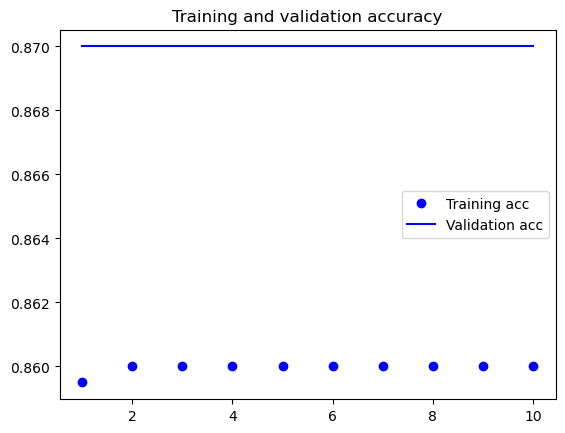

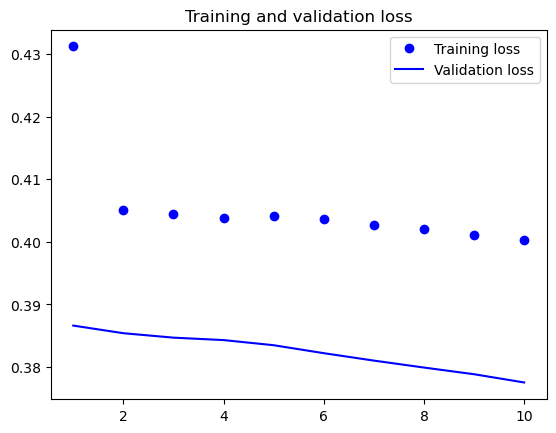

In [280]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [289]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(1000, 8,input_length=100))
model.add(LSTM(8,return_sequences=True))
model.add(LSTM(8))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x, y,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
63/63 [==============================] - 14s 117ms/step - loss: 0.5338 - acc: 0.8460 - val_loss: 0.4087 - val_acc: 0.8700
Epoch 2/10
63/63 [==============================] - 6s 91ms/step - loss: 0.4094 - acc: 0.8600 - val_loss: 0.3873 - val_acc: 0.8700
Epoch 3/10
63/63 [==============================] - 6s 91ms/step - loss: 0.4053 - acc: 0.8600 - val_loss: 0.3869 - val_acc: 0.8700
Epoch 4/10
63/63 [==============================] - 6s 99ms/step - loss: 0.4052 - acc: 0.8600 - val_loss: 0.3866 - val_acc: 0.8700
Epoch 5/10
63/63 [==============================] - 7s 104ms/step - loss: 0.4052 - acc: 0.8600 - val_loss: 0.3872 - val_acc: 0.8700
Epoch 6/10
63/63 [==============================] - 6s 94ms/step - loss: 0.4051 - acc: 0.8600 - val_loss: 0.3873 - val_acc: 0.8700
Epoch 7/10
63/63 [==============================] - 6s 92ms/step - loss: 0.4049 - acc: 0.8600 - val_loss: 0.3861 - val_acc: 0.8700
Epoch 8/10
63/63 [==============================] - 6s 93ms/step - loss: 0.4048 

In [285]:
sequences = tokenizer.texts_to_sequences(df.iloc[2700:2701,1].tolist())
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[33, 88, 40,  6, 33,  6,  6, 34, 29, 41]])

In [286]:
model.predict(x_test)

1/1 [==============================] - 1s 1s/step


array([[0.89638245, 0.10361757]], dtype=float32)

In [287]:
a=model.predict(x_test)
#classes_x=np.argmax(a,axis=1)
binr.inverse_transform(a)

1/1 [==============================] - 0s 36ms/step


array([['ham']], dtype=object)

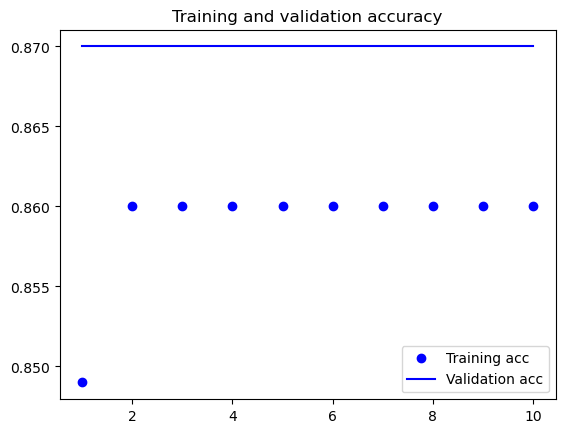

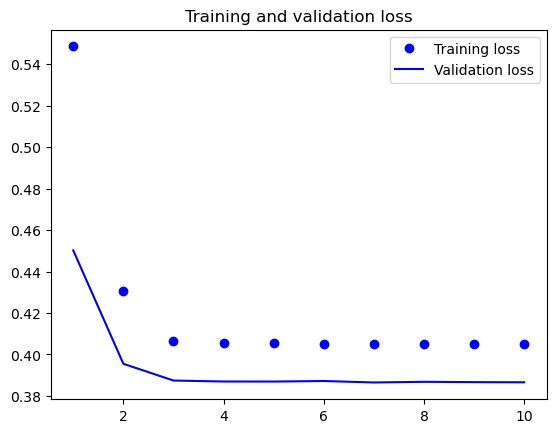

In [288]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()